In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sample_sales_data.csv")

### information of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order ID        100 non-null    int64 
 1   Date            100 non-null    object
 2   Product Name    100 non-null    object
 3   Category        100 non-null    object
 4   Price           100 non-null    int64 
 5   Quantity Sold   100 non-null    int64 
 6   Total Revenue   100 non-null    int64 
 7   Customer ID     100 non-null    int64 
 8   Payment Method  100 non-null    object
dtypes: int64(5), object(4)
memory usage: 7.2+ KB


### example of the dataset

In [4]:
df.head()

,Order ID,Date,Product Name,Category,Price,Quantity Sold,Total Revenue,Customer ID,Payment Method
0,1,2024-01-31,Tablet,Electronics,30000,3,90000,3616,Cash
1,2,2024-01-15,Smartwatch,Accessories,5000,3,15000,1478,Cash
2,3,2024-03-07,Smartwatch,Accessories,5000,2,10000,3134,UPI
3,4,2024-03-23,Gaming Console,Electronics,40000,3,120000,1422,Net Banking
4,5,2024-01-19,Wireless Mouse,Accessories,1500,4,6000,2330,Card


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        100 non-null    int64         
 1   Date            100 non-null    datetime64[ns]
 2   Product Name    100 non-null    object        
 3   Category        100 non-null    object        
 4   Price           100 non-null    int64         
 5   Quantity Sold   100 non-null    int64         
 6   Total Revenue   100 non-null    int64         
 7   Customer ID     100 non-null    int64         
 8   Payment Method  100 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 7.2+ KB


In [6]:
df.drop_duplicates()

,Order ID,Date,Product Name,Category,Price,Quantity Sold,Total Revenue,Customer ID,Payment Method
0,1,2024-01-31,Tablet,Electronics,30000,3,90000,3616,Cash
1,2,2024-01-15,Smartwatch,Accessories,5000,3,15000,1478,Cash
2,3,2024-03-07,Smartwatch,Accessories,5000,2,10000,3134,UPI
3,4,2024-03-23,Gaming Console,Electronics,40000,3,120000,1422,Net Banking
4,5,2024-01-19,Wireless Mouse,Accessories,1500,4,6000,2330,Card
...,...,...,...,...,...,...,...,...,...
95,96,2024-01-26,Gaming Console,Electronics,40000,1,40000,2481,Card
96,97,2024-01-01,Laptop,Electronics,60000,1,60000,1448,UPI
97,98,2024-01-19,Tablet,Electronics,30000,1,30000,2642,Card
98,99,2024-03-22,Smartphone,Electronics,25000,1,25000,4758,Net Banking


In [7]:
df.describe()

,Order ID,Date,Price,Quantity Sold,Total Revenue,Customer ID
count,100.000000,100,100.000000,100.000000,100.00000,100.000000
mean,50.500000,2024-02-13 05:45:36,16015.000000,2.980000,44035.00000,2987.870000
min,1.000000,2024-01-01 00:00:00,800.000000,1.000000,800.00000,1018.000000
25%,25.750000,2024-01-17 18:00:00,1500.000000,2.000000,4000.00000,1823.500000
50%,50.500000,2024-02-12 12:00:00,3000.000000,3.000000,10000.00000,3072.000000
75%,75.250000,2024-03-09 12:00:00,30000.000000,4.000000,60000.00000,4143.500000
max,100.000000,2024-03-31 00:00:00,60000.000000,5.000000,300000.00000,4985.000000
std,29.011492,NaN,20090.031575,1.414071,61263.18514,1230.450321


In [8]:
topProducts = df.groupby("Product Name")["Quantity Sold"].sum().sort_values(ascending=False)
topProducts.head()

Product Name
T-shirt           45
Wireless Mouse    40
Smartphone        36
Smartwatch        36
Headphones        33
Name: Quantity Sold, dtype: int64

In [9]:
revenue = df.groupby("Category")["Total Revenue"].sum().sort_values(ascending=False)
revenue

Category
Electronics    3970000
Accessories     306000
Fashion         127500
Name: Total Revenue, dtype: int64

In [10]:
paymentCount = df["Payment Method"].value_counts()
paymentCount  

Payment Method
Card           28
Cash           25
Net Banking    24
UPI            23
Name: count, dtype: int64

## Data Visualisation

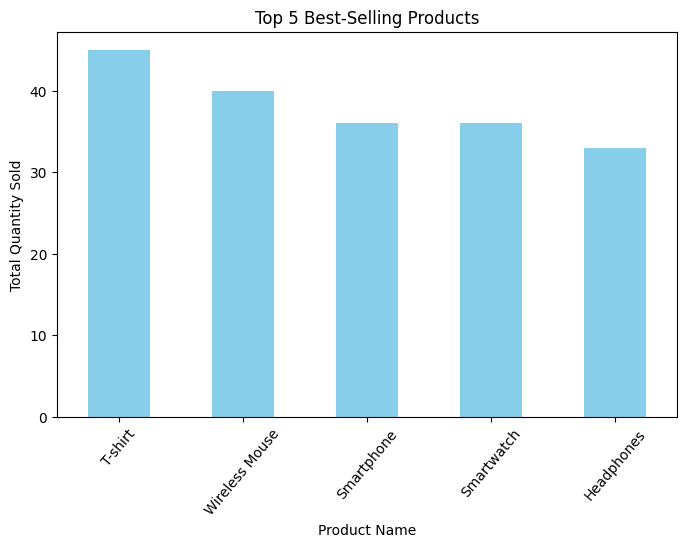

In [11]:
# top 5 selling products 

topProducts.head().plot(kind="bar",color="skyblue",figsize=(8,5))

plt.title("Top 5 Best-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=50)
plt.show()

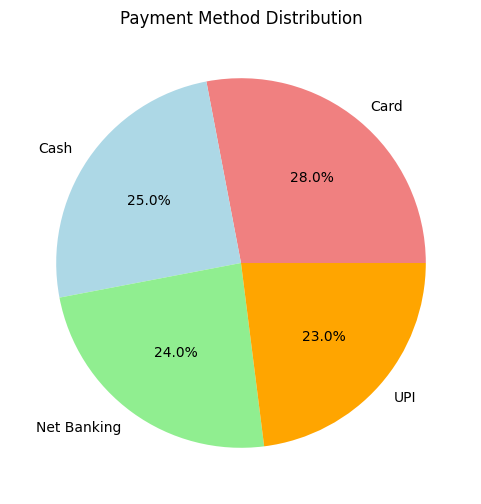

In [12]:
# Plot payment method distribution

paymentCount.plot(kind='pie',autopct="%1.1f%%" ,figsize=(6,6) ,colors=["lightcoral","lightblue","lightgreen","orange"])

plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

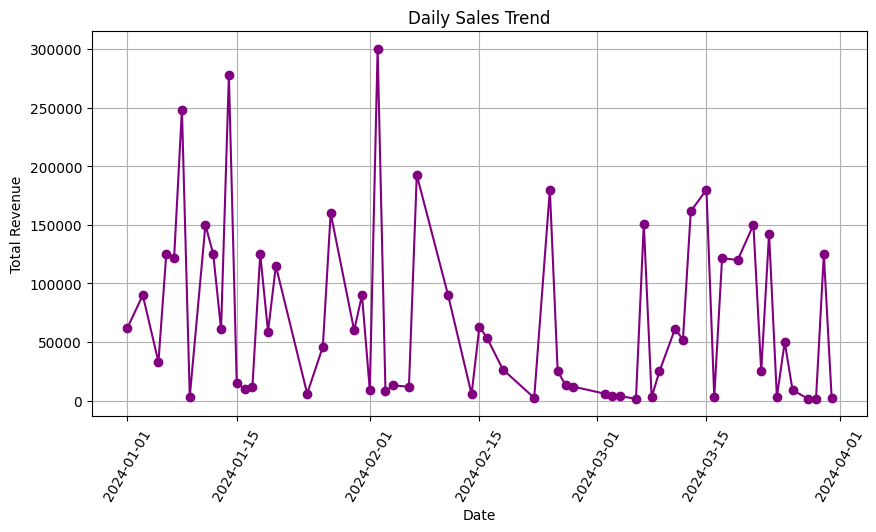

In [13]:
# group sales data by date
daily_sales = df.groupby("Date")["Total Revenue"].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_sales, marker="o",linestyle="-",color="purple")

plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=60)
plt.grid()
plt.show()